In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
PATH_ANIME = "/content/anime.csv"
PATH_RATING = "/content/rating.csv"

anime_df = pd.read_csv(PATH_ANIME)
rating_df = pd.read_csv(PATH_RATING)

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
print("Shape of anime dataframe:", anime_df.shape)
print("Shape of rating dataframe:", rating_df.shape)

Shape of anime dataframe: (12294, 7)
Shape of rating dataframe: (7813737, 3)


---
**Definition of Like :** If the mean rating of user is higher than anime rating, then we extrapolate that the user has enjoyed the content.

---

### Observe Mean Values of Users

In [6]:
# 1st user has pretty low rating mean
# probably did not watch much anime because -1 rate stands for not watched yet animes
# maybe just wacthed death note and naruto lmao
rating_df[rating_df.user_id == 1].mean()

user_id         1.000000
anime_id    12888.483660
rating         -0.712418
dtype: float64

In [7]:
# 45th user has high rating mean
# this guy is otaku i bet
rating_df[rating_df.user_id == 45].mean()

user_id       45.000000
anime_id    6499.269231
rating         8.269231
dtype: float64

In [8]:
# 666th user has average rating mean
rating_df[rating_df.user_id == 666].mean()

user_id       666.000000
anime_id    16063.006536
rating          5.124183
dtype: float64

In [9]:
# mean rate per user
mrpu = rating_df.groupby([rating_df.user_id]).mean().reset_index()
mrpu["mean_rating"] = mrpu["rating"]

mrpu.drop(["rating", "anime_id"], axis=1, inplace=True)
mrpu.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [10]:
mean_rating_df = pd.merge(rating_df, mrpu, on=["user_id", "user_id"])
mean_rating_df.head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


### Compare rating and mean_rating and Decide Contentment

In [11]:
like_table = mean_rating_df.drop(mean_rating_df[mean_rating_df.rating < mean_rating_df.mean_rating].index)
like_table.head()

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667


In [12]:
# fav animes of 1st user
like_table[like_table.user_id == 1]

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [13]:
# fav animes of user 45th
like_table[like_table.user_id == 45]

,user_id,anime_id,rating,mean_rating
4369,45,853,10,8.269231
4371,45,1571,9,8.269231
4373,45,3457,9,8.269231
4375,45,4722,9,8.269231
4379,45,6547,10,8.269231
4381,45,7054,10,8.269231
4385,45,10800,9,8.269231
4386,45,11111,9,8.269231
4388,45,11757,9,8.269231


In [14]:
# fav animes of user 666th, looks like he is the real otaku not 45th user
like_table[like_table.user_id == 666]

,user_id,anime_id,rating,mean_rating
64762,666,20,10,5.124183
64763,666,30,6,5.124183
64764,666,32,6,5.124183
64765,666,121,9,5.124183
64766,666,154,8,5.124183
...,...,...,...,...
64887,666,25159,7,5.124183
64888,666,25397,6,5.124183
64889,666,25835,7,5.124183
64892,666,27655,7,5.124183


### Combine Anime and Rating Datasets

In [15]:
anime_like_df = pd.merge(anime_df, like_table, on=["anime_id", "anime_id"])
anime_like_df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298


In [16]:
print("Shape of users rating table: ", like_table.shape)
print("Shape of user-anime table: ", anime_like_df.shape)
print("Amount of unique anime in dataset: ", anime_like_df.anime_id.unique().shape)

Shape of users rating table:  (4262566, 4)
Shape of user-anime table:  (4262561, 10)
Amount of unique anime in dataset:  (10756,)


### Create Blank Table

In [17]:
# data is so big that session has crashed
# so take first 20,000 user
anime_like_df = anime_like_df[anime_like_df.user_id <= 20000]

anime_table = pd.crosstab(anime_like_df.user_id, anime_like_df.name)
anime_table.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
print("Shape of cross table: ", anime_table.shape)

Shape of cross table:  (20000, 7852)


### Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=3) # aaand we can visualize it on 3D plane
pca.fit(anime_table)
pca_samples = pca.transform(anime_table)

pca_df = pd.DataFrame(pca_samples)
pca_df.head()

,0,1,2
0,-1.579129,-0.500240,0.415763
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985803
3,0.199435,-0.291005,0.681047
4,3.532125,-0.184795,-0.743307


* There are 3 components in the columns as we declared.

In [21]:
to_cluster = pd.DataFrame(pca_df[[0, 1, 2]])
to_cluster.head()

,0,1,2
0,-1.579129,-0.500240,0.415763
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985803
3,0.199435,-0.291005,0.681047
4,3.532125,-0.184795,-0.743307


In [22]:
# pca_df and to_cluster are the same
(pca_df == to_cluster).value_counts()

0     1     2   
True  True  True    20000
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


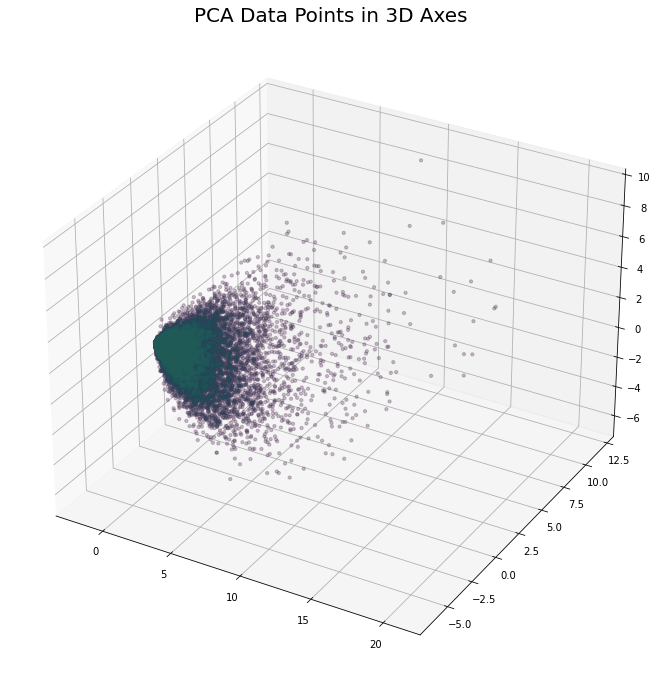

In [23]:
fig = plt.figure(figsize=(16, 9))
colors = ["#880808", "#4b0082", "#1f6357"]

ax = Axes3D(fig)

for i in colors:
  ax.scatter(xs=to_cluster[0], ys=to_cluster[1], zs=to_cluster[2], c=i, s=10, alpha=0.1)

plt.title("PCA Data Points in 3D Axes", fontsize=20)
plt.show()

## Clustering with K-Means

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
scores = []
inertia_list = np.empty(8)

for i in range(2, 8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(to_cluster)
  inertia_list[i] = kmeans.inertia_
  scores.append(silhouette_score(to_cluster, kmeans.labels_))

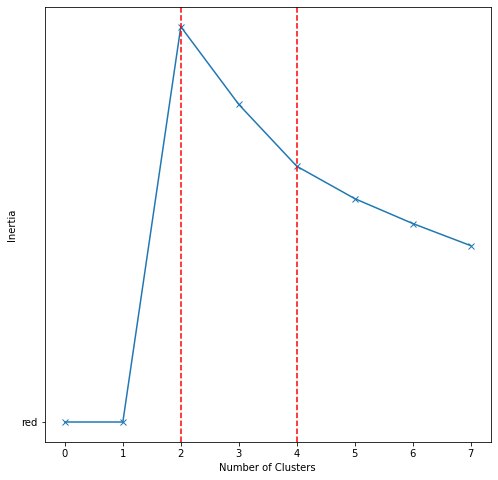

In [28]:
plt.figure(figsize=(8,8))

plt.plot(range(8), inertia_list, "-x", "red")

plt.axvline(x=2, color="red", linestyle="--")
plt.axvline(x=4, color="red", linestyle="--")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

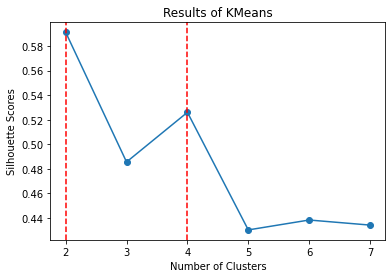

In [29]:
plt.plot(range(2, 8), scores, "-o")

plt.axvline(x=2, color="red", linestyle="--")
plt.axvline(x=4, color="red", linestyle="--")

plt.title("Results of KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")

plt.show()

---
* Optimal number of clusters are 2 and 4. So, select it and train/try again. :)
---


### K-Clusters for k=2 and k=4

In [33]:
cluster2 = KMeans(n_clusters=2, random_state=42)
cluster2.fit(to_cluster)

centers2 = cluster2.cluster_centers_
preds2 = cluster2.predict(to_cluster)

print("Centers for 2-clusters:\n")
print(centers2)

Centers for 2-clusters:

[[-0.80151774  0.03666662  0.02966081]
 [ 3.79302364 -0.17351748 -0.14036389]]


In [32]:
cluster4 = KMeans(n_clusters=4, random_state=42)
cluster4.fit(to_cluster)

centers4 = cluster4.cluster_centers_
preds4 = cluster4.predict(to_cluster)

print("Centers for 4-clusters:\n")
print(centers4)

Centers for 4-clusters:

[[ 1.67196642  2.31116349 -0.02445727]
 [-1.08558179 -0.04182849  0.0665579 ]
 [ 7.61706623 -0.63839947  0.84044609]
 [ 1.99587475 -1.13262734 -0.44024716]]


### Visualize Clusters

In [38]:
# for interactive 3D plot
import plotly.express as px

In [60]:
# 2-cluster
px.scatter_3d(to_cluster, x=0, y=1, z=2, color=preds2, opacity=0.7)

In [59]:
# 4-cluster
px.scatter_3d(to_cluster, x=0, y=1, z=2, color=preds4, opacity=0.7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


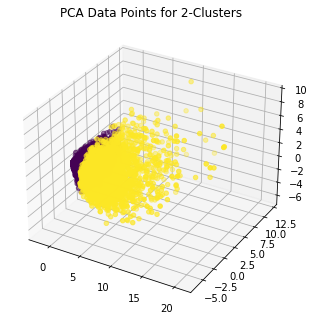

In [36]:
# static style 2-cluster
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(to_cluster[0], to_cluster[1], to_cluster[2], c=preds2)
plt.title("PCA Data Points for 2-Clusters")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


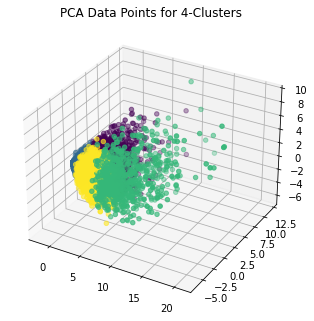

In [37]:
# static style 4-cluster
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(to_cluster[0], to_cluster[1], to_cluster[2], c=preds4)
plt.title("PCA Data Points for 4-Clusters")

plt.show()

### Visualize in 2D

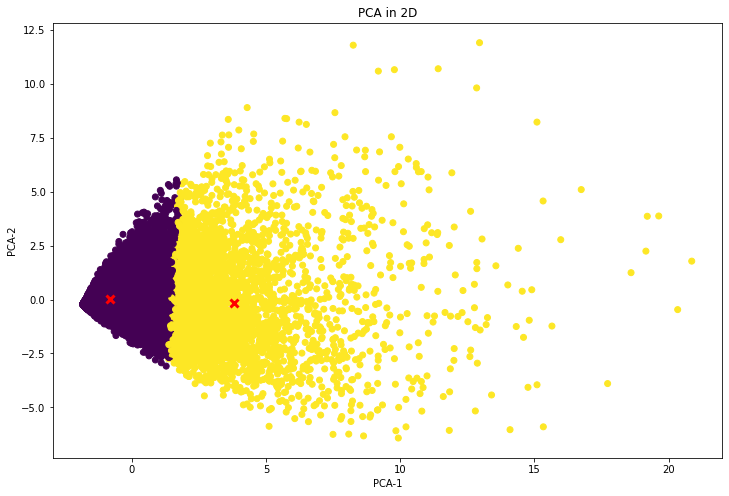

In [80]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(to_cluster[0], to_cluster[1], c=preds2)

for c in centers2:
  plt.plot(c[0], c[1], markersize=8, color="red", marker="x", mew=3)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")

plt.title("PCA in 2D")

plt.show()

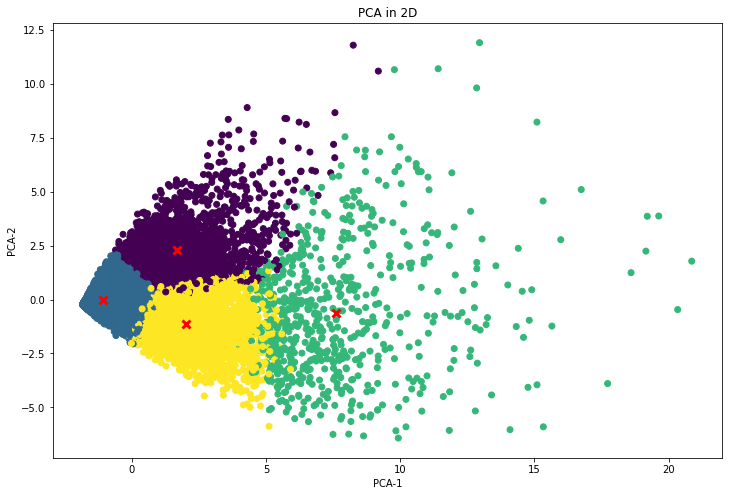

In [79]:
plt.figure(figsize=(12, 8))

plt.scatter(to_cluster[0], to_cluster[1], c=preds4)

for c in centers4:
  plt.plot(c[0], c[1], markersize=8, color="red", marker="x", mew=3)

plt.xlabel("PCA-1")
plt.ylabel("PCA-2")

plt.title("PCA in 2D")

plt.show()

---
* Lastly, let's add predictions to anime dataset and look at the results. I will proceed with 4-clusters predictions.
---


In [83]:
anime_table["cluster_4"] = preds4
anime_table.head()

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster_4
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### Extract Each Cluster and Observe Animes

In [90]:
# there are four clusters = c0, c1, c2 and c3
# extract mean ratings for every anime for every cluster
c0 = anime_table[anime_table.cluster_4 == 0].drop("cluster_4", axis=1).mean()
c1 = anime_table[anime_table.cluster_4 == 1].drop("cluster_4", axis=1).mean()
c2 = anime_table[anime_table.cluster_4 == 2].drop("cluster_4", axis=1).mean()
c3 = anime_table[anime_table.cluster_4 == 3].drop("cluster_4", axis=1).mean()

In [95]:
print("Length of Cluster-1:", len(c0))
print("Length of Cluster-2:", len(c1))
print("Length of Cluster-3:", len(c2))
print("Length of Cluster-4:", len(c3))

Length of Cluster-1: 7852
Length of Cluster-2: 7852
Length of Cluster-3: 7852
Length of Cluster-4: 7852


In [97]:
print("CLUSTER-1")
print("*" * 10)
c0.sort_values(ascending=False)[:20]

CLUSTER-1
**********


name
Death Note                               0.680136
Code Geass: Hangyaku no Lelouch          0.666991
Code Geass: Hangyaku no Lelouch R2       0.608569
Fullmetal Alchemist                      0.599805
Sen to Chihiro no Kamikakushi            0.583739
Suzumiya Haruhi no Yuuutsu               0.550633
Neon Genesis Evangelion                  0.537001
Tengen Toppa Gurren Lagann               0.528238
Cowboy Bebop                             0.524830
Fullmetal Alchemist: Brotherhood         0.509250
Mononoke Hime                            0.500487
Toradora!                                0.488802
Elfen Lied                               0.482960
Howl no Ugoku Shiro                      0.480039
Samurai Champloo                         0.477605
Toki wo Kakeru Shoujo                    0.455209
Darker than Black: Kuro no Keiyakusha    0.441091
Clannad                                  0.434275
Black Lagoon                             0.415774
Ouran Koukou Host Club                   0.41

In [100]:
print("CLUSTER-2")
print("*" * 10)
c1.sort_values(ascending=False)[:20]

CLUSTER-2
**********


name
Death Note                            0.320761
Shingeki no Kyojin                    0.231017
Sword Art Online                      0.199385
Fullmetal Alchemist: Brotherhood      0.182065
Code Geass: Hangyaku no Lelouch       0.179417
Sen to Chihiro no Kamikakushi         0.159808
Angel Beats!                          0.157661
Fullmetal Alchemist                   0.155800
Code Geass: Hangyaku no Lelouch R2    0.154011
Naruto                                0.146354
Elfen Lied                            0.144135
Ouran Koukou Host Club                0.133830
Mirai Nikki (TV)                      0.121735
Toradora!                             0.118586
Howl no Ugoku Shiro                   0.114578
Steins;Gate                           0.112789
Clannad                               0.109926
Tengen Toppa Gurren Lagann            0.108924
Soul Eater                            0.105489
Dragon Ball Z                         0.103772
dtype: float64

In [101]:
print("CLUSTER-3")
print("*" * 10)
c2.sort_values(ascending=False)[:20]

CLUSTER-3
**********


name
Angel Beats!                                           0.836283
No Game No Life                                        0.818584
Toradora!                                              0.815634
Code Geass: Hangyaku no Lelouch                        0.803835
Steins;Gate                                            0.792035
Shingeki no Kyojin                                     0.783186
Code Geass: Hangyaku no Lelouch R2                     0.777286
Sword Art Online                                       0.768437
Bakemonogatari                                         0.758112
Death Note                                             0.755162
Hataraku Maou-sama!                                    0.730088
Fullmetal Alchemist: Brotherhood                       0.730088
Clannad                                                0.724189
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.721239
Chuunibyou demo Koi ga Shitai!                         0.718289
Mirai Nikki (TV)                   

In [102]:
print("CLUSTER-4")
print("*" * 10)
c3.sort_values(ascending=False)[:20]

CLUSTER-4
**********


name
Shingeki no Kyojin                                          0.728073
No Game No Life                                             0.647041
Sword Art Online                                            0.614568
Angel Beats!                                                0.600303
Death Note                                                  0.593020
Steins;Gate                                                 0.553869
Fullmetal Alchemist: Brotherhood                            0.541426
Toradora!                                                   0.517754
Mirai Nikki (TV)                                            0.515933
Code Geass: Hangyaku no Lelouch                             0.507132
Code Geass: Hangyaku no Lelouch R2                          0.479211
Noragami                                                    0.468892
One Punch Man                                               0.465250
Tokyo Ghoul                                                 0.464643
Ano Hi Mita Hana no Namae wo 

In [180]:
d= { "Point" : list(c0.values) + list(c1.values) + list(c2.values) + list(c3.values),
      "AnimeName" : list(c0.index) + list(c1.index) + list(c2.index) + list(c3.index),
      "ClusterType" : [1] * len(c0) + [2] * len(c1) + [3] * len(c2) + [4] * len(c3)
}

clustered_anime = pd.DataFrame(d, columns=["AnimeName", "ClusterType", "Point"])
clustered_anime.head()

,AnimeName,ClusterType,Point
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,1,0.014119
1,&quot;Bungaku Shoujo&quot; Memoire,1,0.011198
2,&quot;Bungaku Shoujo&quot; Movie,1,0.023856
3,&quot;Eiji&quot;,1,0.000487
4,.hack//G.U. Returner,1,0.013632


In [182]:
# to download files
from google.colab import files

In [183]:
# save files
anime_table.to_csv("/content/enjoyed_animes_user.csv")
files.download("/content/enjoyed_animes_user.csv")

clustered_anime.to_csv("/content/clustered_anime.csv")
files.download("/content/clustered_anime.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>